In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# logistic regression

------------------> logistic regression must use feature scaling before give to a model    
    
    
    penalty='l2', ---->regulization parameter(l1,l2)
    *,
    dual=False,---->Dual or primal formulation. Dual formulation is only implemented for
                    l2 penalty with liblinear solver. Prefer dual=False when
                    n_samples > n_features.
    tol=0.0001,----->Tolerance for stopping criteria.
    C=1.0,---------->Inverse of regularization strength; must be a positive float.
                    Like in support vector machines, smaller values specify stronger
                    regularization.
    fit_intercept=True,------>Specifies if a constant (a.k.a. bias or intercept) should be
                                added to the decision function
    intercept_scaling=1,-----> Useful only when the solver 'liblinear' is used
                                and self.fit_intercept is set to True. In this case, x becomes
                                [x, self.intercept_scaling],
                                i.e. a "synthetic" feature with constant value equal to
                                intercept_scaling is appended to the instance vector.
                                The intercept becomes ,intercept_scaling * synthetic_feature_weight.
                                Note! the synthetic feature weight is subject to l1/l2 regularization
                                as all other features.
                                To lessen the effect of regularization on synthetic feature weight
                                (and therefore on the intercept) intercept_scaling has to be increased
   class_weight=None,---------->if you have a imbalenced data then we use this argument,if we don't use this argument for 
                                imbalenced data,this model doesn't work properly
   random_state=None,---------->Used when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle the
                                data. See :term:`Glossary <random_state>` for details.

   solver='lbfgs',------------> {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'},default='lbfgs'
                                Algorithm to use in the optimization problem.
                                - For small datasets, 'liblinear' is a good choice, whereas 'sag' and
                                  'saga' are faster for large ones.
                                - For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs'
                                  handle multinomial loss; 'liblinear' is limited to one-versus-rest
                                  schemes.
                                - 'newton-cg', 'lbfgs', 'sag' and 'saga' handle L2 or no penalty
                                - 'liblinear' and 'saga' also handle L1 penalty
                                - 'saga' also supports 'elasticnet' penalty
                                - 'liblinear' does not support setting ``penalty='none'``
                                Note that 'sag' and 'saga' fast convergence is only guaranteed on
                                features with approximately the same scale. You can
                                preprocess the data with a scaler from sklearn.preprocessing.
    max_iter=100,-------->int, default=100
                           Maximum number of iterations taken for the solvers to converge.
    multi_class='auto',---->{'auto', 'ovr', 'multinomial'}, default='auto'
                            If the option chosen is 'ovr', then a binary problem is fit for each
                            label. For 'multinomial' the loss minimised is the multinomial loss fit
                            across the entire probability distribution, *even when the data is
                            binary*. 'multinomial' is unavailable when solver='liblinear'.
                            'auto' selects 'ovr' if the data is binary, or if solver='liblinear',
                            and otherwise selects 'multinomial'.
    verbose=0,----------->shows girdsearch CV messeges
    warm_start=False,
    n_jobs=None---------->core of the CPU,
    l1_ratio=None,


In [3]:
df=pd.read_csv("e:/machine_learning _datasets/heart_.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:xlabel='target', ylabel='count'>

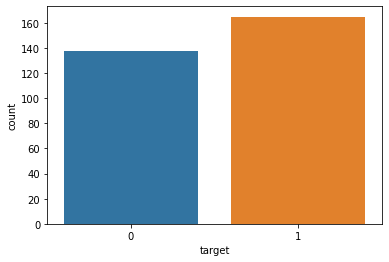

In [5]:
sns.countplot(df.target)

In [6]:
for i in df.columns:
    print(df[i].unique())

[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
[1 0]
[3 2 1 0]
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
[1 0]
[0 1 2]
[150 187 172 178 163 148 1

In [7]:
from sklearn.linear_model import LogisticRegression


In [8]:
parm=[{"penalty":["l1","l2"],
      }]
mod=LogisticRegression()

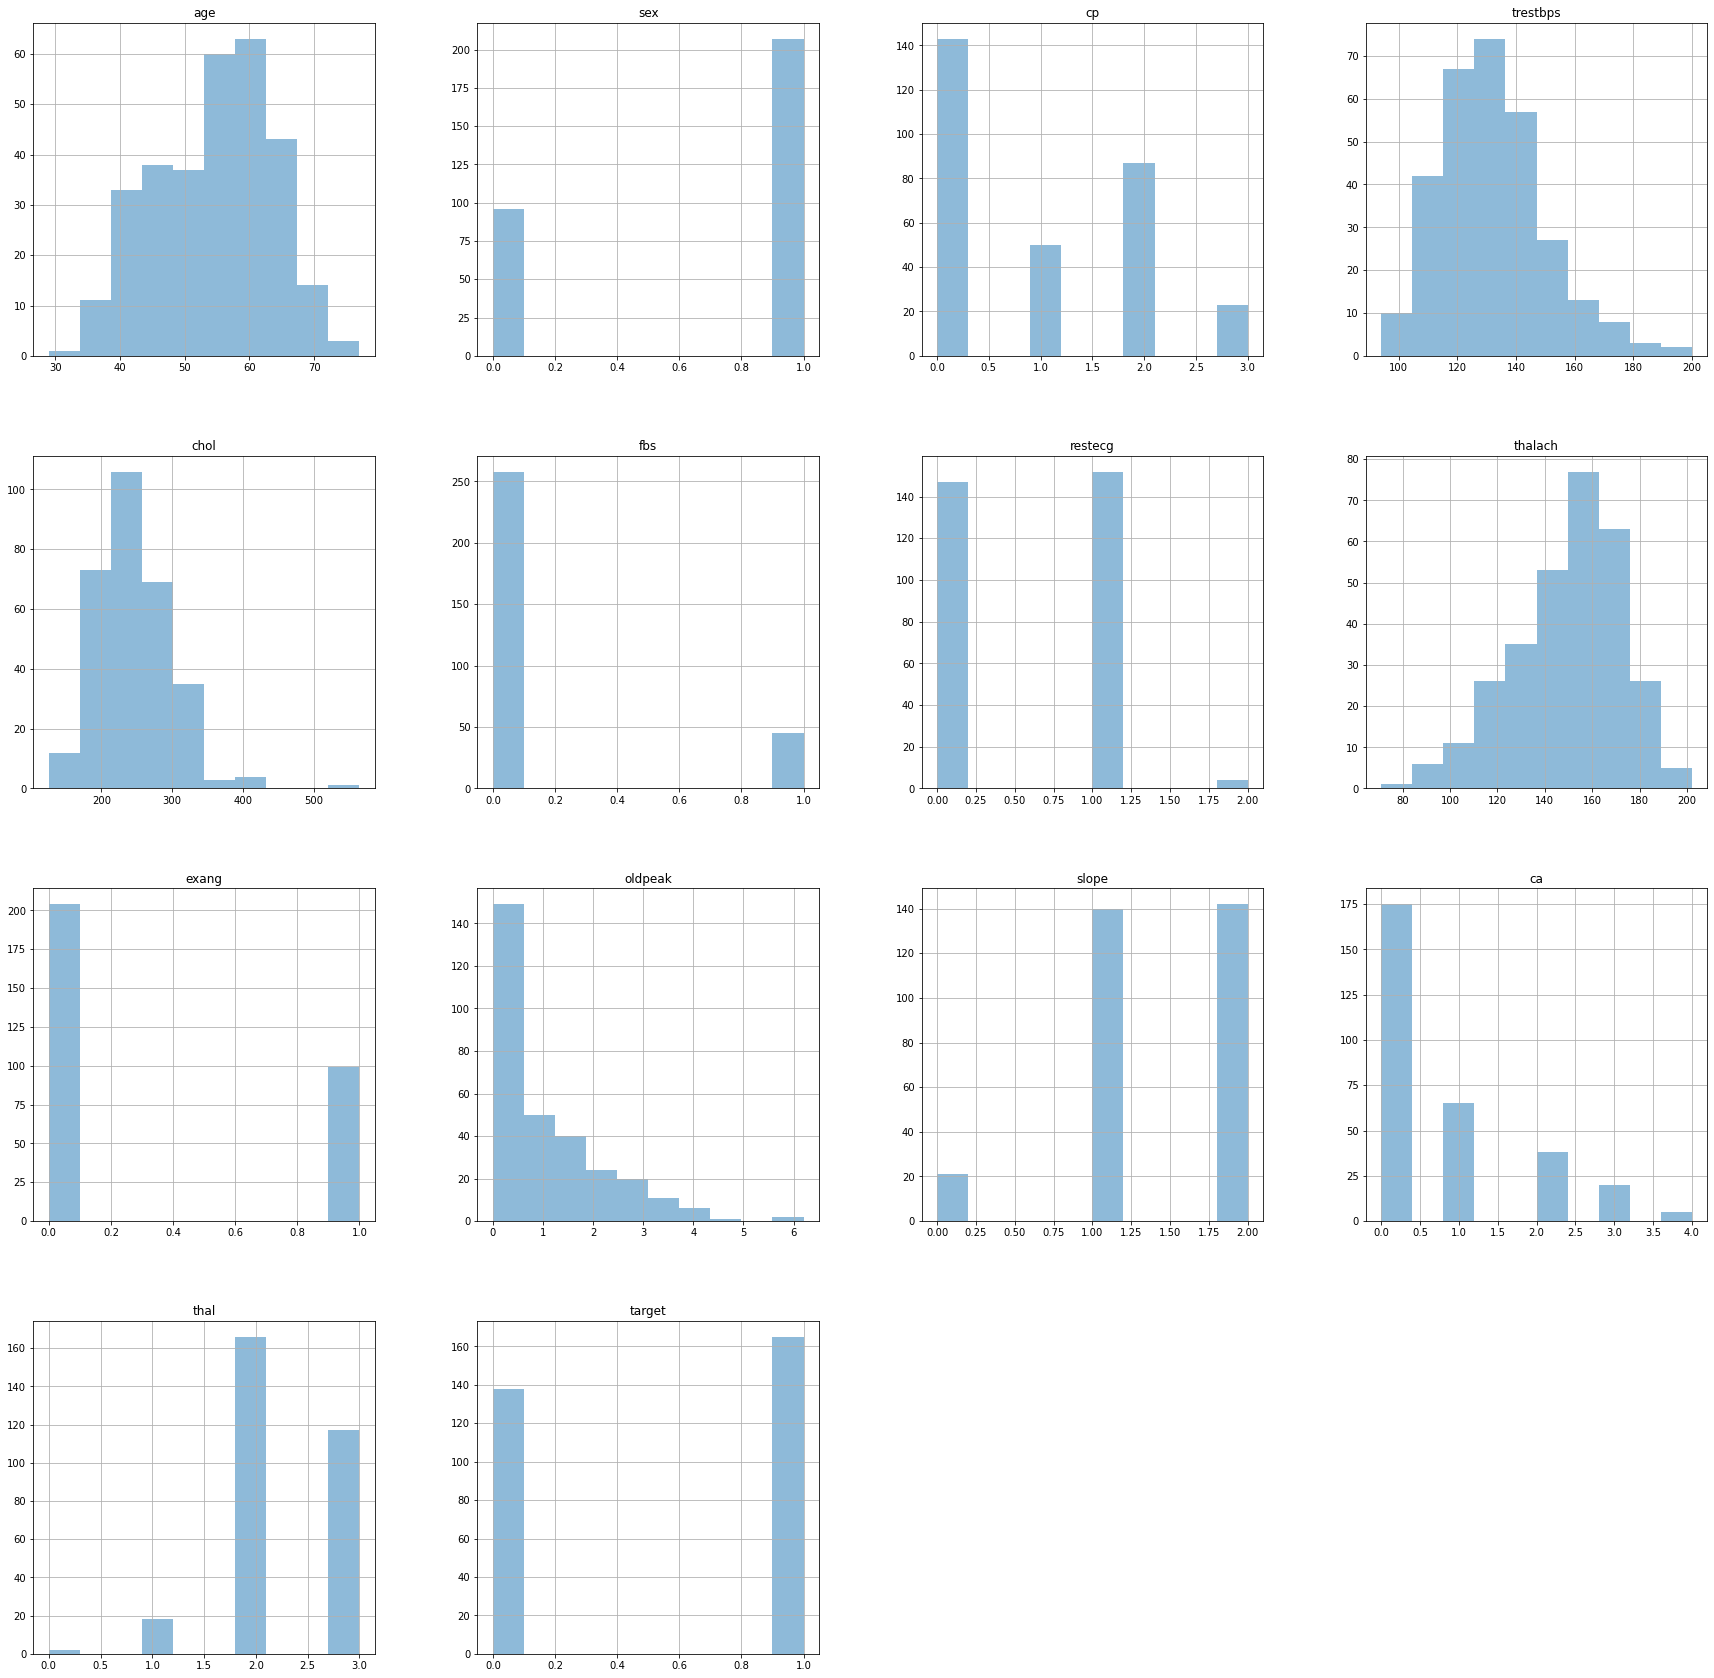

In [9]:
df.hist(alpha=0.5,figsize=(30,30))
plt.show()

In [11]:
#df["oldpeak"]=np.log(df["oldpeak"])

(array([149.,  50.,  40.,  24.,  20.,  11.,   6.,   1.,   0.,   2.]),
 array([0.  , 0.62, 1.24, 1.86, 2.48, 3.1 , 3.72, 4.34, 4.96, 5.58, 6.2 ]),
 <BarContainer object of 10 artists>)

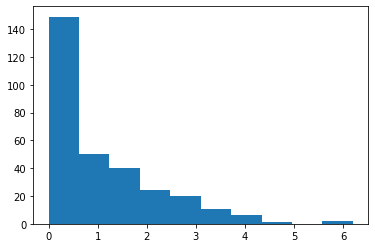

In [26]:
plt.hist(df["oldpeak"])

In [12]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

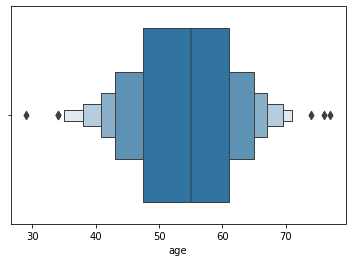

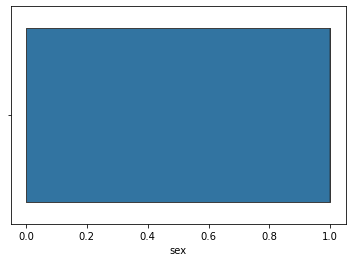

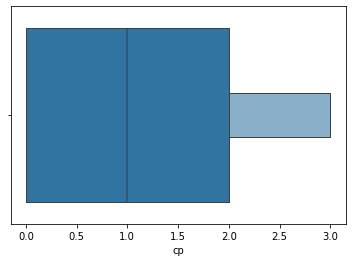

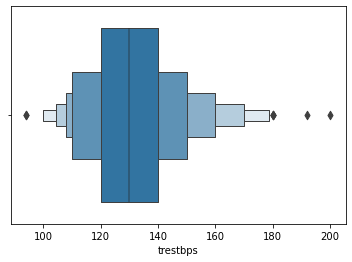

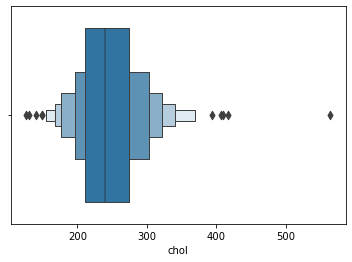

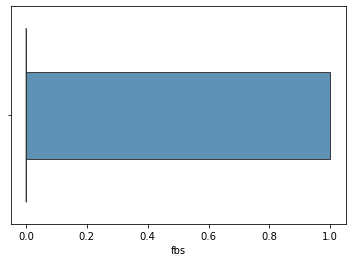

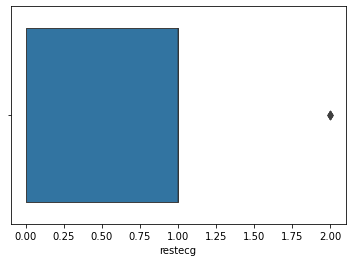

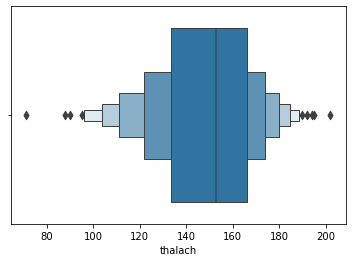

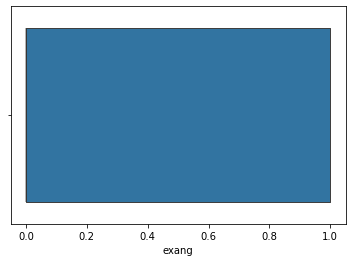

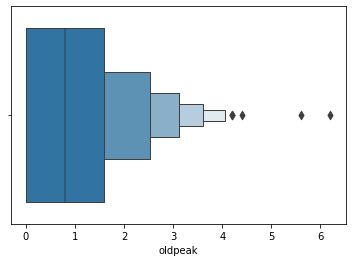

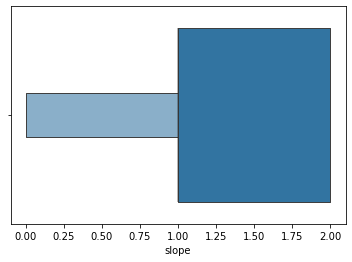

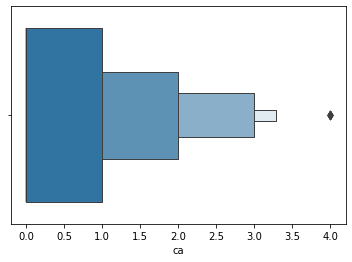

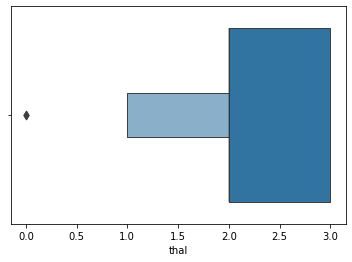

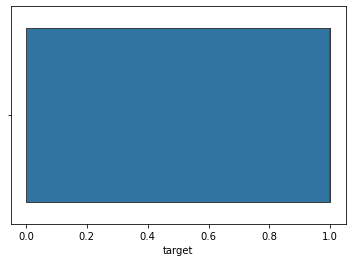

In [28]:
for i in df.columns:
    sns.boxenplot(df[i])
    plt.show()

### standed scaler

In [13]:
X=df.drop("target",axis=1)
Y=df["target"]

In [15]:
s=StandardScaler()
x=s.fit_transform(X)

In [16]:
data=pd.DataFrame(x,columns=X.columns)
data.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
5,0.290464,0.681005,-0.938515,0.478391,-1.048678,-0.417635,0.898962,-0.072018,-0.696631,-0.551783,-0.649113,-0.714429,-2.148873
6,0.180175,-1.468418,0.032031,0.478391,0.922521,-0.417635,-1.005832,0.146634,-0.696631,0.224643,-0.649113,-0.714429,-0.512922
7,-1.143291,0.681005,0.032031,-0.663867,0.323431,-0.417635,0.898962,1.021244,-0.696631,-0.896862,0.976352,-0.714429,1.123029
8,-0.260980,0.681005,1.002577,2.306004,-0.913400,2.394438,0.898962,0.540209,-0.696631,-0.465514,0.976352,-0.714429,1.123029
9,0.290464,0.681005,1.002577,1.049520,-1.512490,-0.417635,0.898962,1.064975,-0.696631,0.483451,0.976352,-0.714429,-0.512922


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.24,random_state=7)

In [18]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [19]:
model.fit(x_train,y_train)


LogisticRegression()

In [20]:
pr=model.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [22]:
acc=accuracy_score(y_test,pr)

In [23]:
acc

0.7397260273972602

In [24]:
confusion_matrix(y_test,pr)

array([[23, 14],
       [ 5, 31]], dtype=int64)

### gridseachCV parameters

In [25]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [26]:
parm=[{"penalty":["l1","l2"],
      "C":np.logspace(-4,4,20),
       "max_iter":[100,300,500,1000,3000],
       "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
       "multi_class":['auto', 'ovr']
      }]

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
grid=GridSearchCV(estimator=model,param_grid=parm,cv=7,n_jobs=-1,verbose=True)
grid.fit(x_train,y_train)

Fitting 7 folds for each of 2000 candidates, totalling 14000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 5074 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 13074 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 14000 out of 14000 | elapsed:  1.4min finished


GridSearchCV(cv=7, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 300, 500, 1000, 3000],
                          'multi_class': ['auto', 'ovr'],
                          'penalty': ['l1', 'l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [29]:
grid.best_params_

{'C': 0.012742749857031334,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'liblinear'}

In [30]:
grid.best_score_

0.8825757575757577

In [37]:
model_lr=LogisticRegression(penalty="l2",solver='liblinear',C=0.012742749857031334)

In [38]:
model_lr.fit(x_train,y_train)

LogisticRegression(C=0.012742749857031334, solver='liblinear')

In [39]:
prd=model_lr.predict(x_test)

In [40]:
accuracy_score(y_test,prd)

0.7397260273972602

In [41]:
grid.best_estimator_

LogisticRegression(C=0.012742749857031334, solver='liblinear')

In [42]:
grid.cv

7

## Trees

### parameters
####   criterion='gini',(gini,entropy)
####    splitter='best',(best,random)
####    max_depth=None,(int:,[ give 1- 32])
####    min_samples_split=2,(min no.of samples to split the tree, if samples is less than value it doesnot  split)
####    min_samples_leaf=1,(how many minmum samples must be in leaf)
####    min_weight_fraction_leaf=0.0,
####    max_features=None,(how many features we have to take for calucate gini/entropy and split the tree ,if it is  none  it takes all                                                             features to grow the tree
####    random_state=None,(if we give same random_state value for both in train_test_split and here ,it does not shuffle otherwise it shuffule
####    max_leaf_nodes=None,(when tree is growing depth how many maximum leaf )
####    min_impurity_decrease=0.0,
####    min_impurity_split=None,
####    class_weight=None,
####    presort='deprecated',
####    ccp_alpha=0.0,

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
model=DecisionTreeClassifier()

In [45]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
p=model.predict(x_test)

In [47]:
accuracy_score(p,y_test)

0.684931506849315

In [ ]:
DecisionTreeClassifier()

In [89]:
params={"criterion":['gini',"entropy"],
    "max_depth":[3,5,7],
    "min_samples_split":[i for i in range(2,50,3)],
    #"min_samples_leaf":[i for i in range(1,32,2)],
   "max_features":["auto","log2"],
    #W"max_leaf_nodes":[5,9,13,18,20],
}

In [90]:
grid_s=GridSearchCV(DecisionTreeClassifier(),param_grid=params,cv=5,n_jobs=-1)

In [91]:
grid_s.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'log2'],
                         'min_samples_split': [2, 5, 8, 11, 14, 17, 20, 23, 26,
                                               29, 32, 35, 38, 41, 44, 47]})

In [92]:
grid_s.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_split': 8}

In [93]:
t=grid_s.predict(x_test)

In [94]:
accuracy_score(t,y_test)

0.6438356164383562

### ccp_alpha

In [96]:
from sklearn  import tree

[Text(261.06428571428575, 1032.8400000000001, 'X[2] <= -0.453\ngini = 0.493\nsamples = 230\nvalue = [101, 129]'),
 Text(119.57142857142857, 924.1200000000001, 'X[9] <= -0.293\ngini = 0.399\nsamples = 109\nvalue = [79, 30]'),
 Text(63.77142857142857, 815.4000000000001, 'X[11] <= -0.225\ngini = 0.478\nsamples = 38\nvalue = [15, 23]'),
 Text(31.885714285714286, 706.6800000000001, 'X[0] <= -1.419\ngini = 0.278\nsamples = 24\nvalue = [4, 20]'),
 Text(15.942857142857143, 597.96, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(47.82857142857143, 597.96, 'X[0] <= 0.897\ngini = 0.091\nsamples = 21\nvalue = [1, 20]'),
 Text(31.885714285714286, 489.24, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(63.77142857142857, 489.24, 'X[0] <= 1.007\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(47.82857142857143, 380.5200000000001, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(79.71428571428572, 380.5200000000001, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(95.65714285714286, 706.680

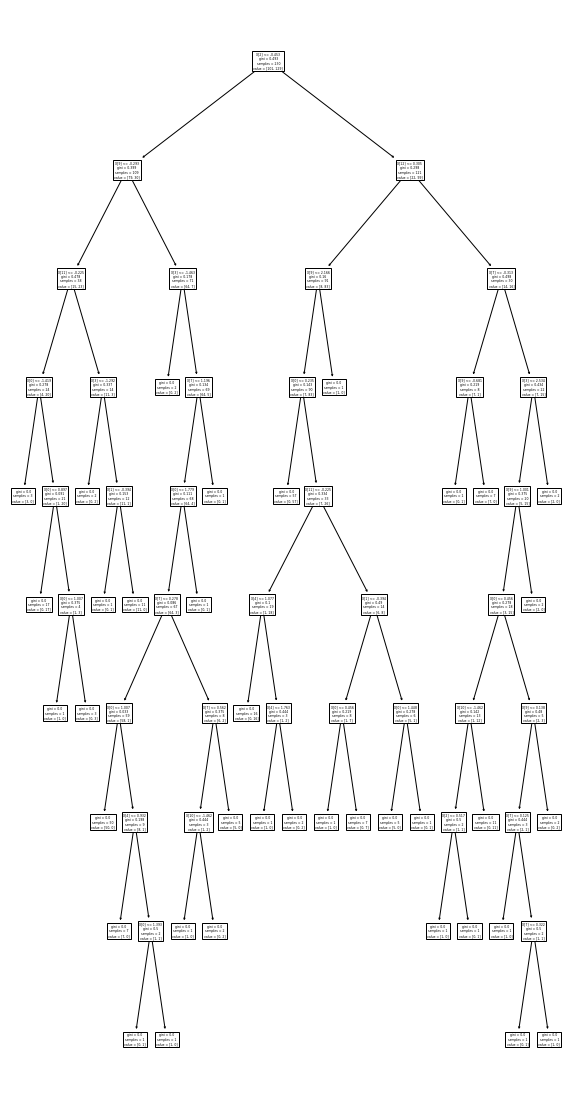

In [98]:
plt.figure(figsize=(10,20))
tree.plot_tree(model,)

In [100]:
path=model.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas=path.ccp_alphas

In [103]:
par={"ccp_alpha":ccp_alphas}
m=GridSearchCV(DecisionTreeClassifier(),par)

In [104]:
m.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.00284942, 0.00289855, 0.00398551, 0.00411899,
       0.00414079, 0.00545687, 0.00724638, 0.0076087 , 0.0076087 ,
       0.00770439, 0.00797101, 0.00988142, 0.01008913, 0.01252588,
       0.01454068, 0.01581686, 0.02070393, 0.02814461, 0.02946497,
       0.05525489, 0.14699745])})

array([0.        , 0.00284942, 0.00289855, 0.00398551, 0.00411899,
       0.00414079, 0.00545687, 0.00724638, 0.0076087 , 0.0076087 ,
       0.00770439, 0.00797101, 0.00988142, 0.01008913, 0.01252588,
       0.01454068, 0.01581686, 0.02070393, 0.02814461, 0.02946497,
       0.05525489, 0.14699745])

### Random Forest

### parameeters

In [95]:
from sklearn.tree import DecisionTreeRegressor

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("e:/machine_learning _datasets/heart_.csv")

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.model_selection import GridSearchCV

In [16]:
params={"n_estimators":[i for i in range(50,150,10)],
       "max_depth":[2,3,4],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[2,4,6],
       "criterion":["gini","entropy"],
        "bootstrap":[True,False],
        "n_jobs":[-1]
       }

In [17]:
grid=GridSearchCV(RandomForestClassifier(random_state=7),param_grid=params,cv=5)

In [5]:
x=df.drop("target",axis=1)
y=df["target"]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

In [18]:
grid.fit(x_train,y_train)

KeyboardInterrupt: 

In [7]:
from sklearn.ensemble import AdaBoostClassifier
# adaboost is ensemble learning method
# ensemble leaning method is multiple model combines together to make a master model

## Ada boost 


### advantages
###### ------> easy to impliment
###### ------> it iteratively corrects the mistakes of weak classifier and improves accuracy by combining weak learners
###### ------> we use many base classifiers with adaboost
###### -----> adaboost is not prone to overfiting
### disadvantage
-----> adaboost is sensitive to noise and outliers

In [26]:
m=AdaBoostClassifier(n_estimators=50,learning_rate=0.75)

In [22]:
from sklearn.model_selection import GridSearchCV
params={"n_estimators":[50,100,150],
       "learning_rate":[0.5,0.75,1.0,1.5,2.0]}

In [23]:
model=GridSearchCV(AdaBoostClassifier(random_state=7),param_grid=params)

In [24]:

model.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(random_state=7),
             param_grid={'learning_rate': [0.5, 0.75, 1.0, 1.5, 2.0],
                         'n_estimators': [50, 100, 150]})

In [25]:
model.best_params_

{'learning_rate': 0.75, 'n_estimators': 50}

In [17]:
pr=model.predict(x_test)

In [27]:
m.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.75)

In [29]:
e=m.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,e)

0.7105263157894737

In [31]:
## new method
from sklearn.linear_model import LogisticRegression
mod=LogisticRegression()
adb=AdaBoostClassifier(base_estimator=mod,learning_rate=0.75)

In [32]:
adb.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=0.75)

In [33]:
prd=adb.predict(x_test)

In [34]:
accuracy_score(y_test,prd)

0.7368421052631579

## gradiant boost _hyper parameter turning


In [1]:
from sklearn.datasets import load_boston

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [4]:
b=load_boston()


In [10]:
x=pd.DataFrame(b.data,columns=b.feature_names)

In [11]:
y=pd.Series(b.target)

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
GradientBoostingRegressor()

## XG- boost


In [9]:
import pandas as pd

In [10]:
df=pd.read_csv("e:/machine_learning _datasets/heart_.csv")

In [11]:
x=df.drop("target",axis=1)
y=df["target"]

In [12]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [15]:
#from xgboost import XGBClassifier

In [16]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

In [7]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [8]:
from sklearn.metrics import accuracy_score

In [19]:
model=XGBClassifier(objective="binary:logistic",missing=None,seed=42)
model.fit(X_train,y_train,early_stopping_rounds=20,eval_metric="aucpr",eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.76474
[1]	validation_0-aucpr:0.76161
[2]	validation_0-aucpr:0.79679
[3]	validation_0-aucpr:0.80489
[4]	validation_0-aucpr:0.81319
[5]	validation_0-aucpr:0.81805
[6]	validation_0-aucpr:0.85002
[7]	validation_0-aucpr:0.84130
[8]	validation_0-aucpr:0.85357
[9]	validation_0-aucpr:0.85445
[10]	validation_0-aucpr:0.84785
[11]	validation_0-aucpr:0.85667
[12]	validation_0-aucpr:0.86038
[13]	validation_0-aucpr:0.85650
[14]	validation_0-aucpr:0.86139
[15]	validation_0-aucpr:0.85725
[16]	validation_0-aucpr:0.85606
[17]	validation_0-aucpr:0.85285
[18]	validation_0-aucpr:0.85552
[19]	validation_0-aucpr:0.84962
[20]	validation_0-aucpr:0.84808
[21]	validation_0-aucpr:0.84652
[22]	validation_0-aucpr:0.84503
[23]	validation_0-aucpr:0.84685
[24]	validation_0-aucpr:0.84651
[25]	validation_0-aucpr:0.84891
[26]	validation_0-aucpr:0.84697
[27]	validation_0-aucpr:0.84874
[28]	validation_0-aucpr:0.84921
[29]	validation_0-aucpr:0.84875
[30]	validation_0-aucpr:0.84763
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [11]:
pr=model.predict(X_test)

In [13]:
model.score(X_test,y_test)

0.7236842105263158

In [14]:
accuracy_score(pr,y_test)

0.7236842105263158

In [20]:
# if our data_set  is imbalence data then we use scale_pos_weight 
params=[{"max_depth":[1,2,3,4,5],
        "n_estimators":[10,50,100,200],
        "learing_rate":[0.01,0.08,0.1,0.5,0.7],
         "gamma":[0,0.50,1,5,10],
         "colsample_bynode":[0.3,0.5,0.7,1],
         "colsample_bytree":[0.5,0,7,1],
         "reg_lambda":[1,5,10,20]
         
        }]
m=GridSearchCV(XGBClassifier(random_state=7,objective="binary:logistic"),param_grid=params,cv=3,scoring="accuracy",n_jobs=-1)

In [ ]:
m.fit(X_train,y_train)

In [5]:
from sklearn.neighbors import KNeighborsClassifier


## KNN

In [17]:
m=KNeighborsClassifier()
m.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2


In [24]:
#m.score(X_test,y_test)
parm={"n_neighbors":[3,5,7,9,11,15,17],
     "p":[1,2],
      "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
      
     }

In [25]:
grid=GridSearchCV(KNeighborsClassifier(),param_grid=parm,n_jobs=-1)

In [26]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15, 17], 'p': [1, 2]})

In [27]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}

In [28]:
grid.best_score_

0.7361352657004832

In [31]:
m=KNeighborsClassifier(n_neighbors=9,p=1,algorithm="kd_tree")
m.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=9, p=1)

In [32]:
m.score(X_test,y_test)

0.6710526315789473

## Naive bayes classifier

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import urllib
import numpy as np

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
data=pd.read_csv("https://github.com/codebasics/py/blob/21a0f1001e03c9c58b96009fba738001c8422d3f/ML/14_naive_bayes/spam.csv",header=None)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 78, saw 2


In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [9]:
#MULTINOMIAL-----> good for when your features (categorical or continuous) describe discrete frequency count
# Bernoulli ----->good for making prediction from binary features
#GAUSSIAN -------> good for making prediction from normally distributed features

In [18]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv")

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [7]:
df=pd.get_dummies(df,columns=["Category"],drop_first=True)
# here 1---->spam 0--->not a spam

In [8]:
df.head()


,Message,Category_spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
df.Category_spam.value_counts()

0    4825
1     747
Name: Category_spam, dtype: int64

In [10]:
x=df.iloc[:,0]
y=df.iloc[:,1]

In [25]:

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

In [26]:
c_v=CountVectorizer()
X_train_c=c_v.fit_transform(X_train)

In [21]:
X_test_c=c_v.transform(X_test)

In [27]:
X_train_c.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
model=MultinomialNB()

In [31]:
model.fit(X_train_c,y_train)

MultinomialNB()

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv")
df.columns

Index(['Category', 'Message'], dtype='object')

In [6]:
data=pd.get_dummies(df,columns=["Category"],drop_first=True)

In [7]:
x=data.iloc[:,0]
y=data.iloc[:,1]

In [8]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
c_v=CountVectorizer()
x_train_cv=c_v.fit_transform(X_train)
x_train_cv.toarray()[:4]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
model=MultinomialNB()
model.fit(x_train_cv,y_train)

MultinomialNB()

In [11]:
x_test_cv=c_v.transform(X_test)

In [12]:
model.score(x_test_cv,y_test)

0.9834888729361091

In [13]:
from sklearn.pipeline import Pipeline

In [19]:
p_n=Pipeline([("vecotrized",CountVectorizer()),
              ("model",MultinomialNB())])


In [22]:
p_n.fit(X_train,y_train)

Pipeline(steps=[('vecotrized', CountVectorizer()), ('model', MultinomialNB())])

In [23]:
p_n.score(X_test,y_test)

0.9834888729361091